Building Permit DSBI Project 

In [1]:
#Importing the necessary libraries
%pip install -q pandas numpy matplotlib seaborn scikit-learn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importing the evaluation parameters
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


Connecting CSV File

In [2]:
df = pd.read_csv('Building_Permits_20250331.csv')
df.head()

,PermitNum,PermitClass,PermitClassMapped,PermitTypeMapped,PermitTypeDesc,Description,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,...,RelatedMup,OriginalAddress1,OriginalCity,OriginalState,OriginalZip,ContractorCompanyName,Link,Latitude,Longitude,Location1
0,3001776-EX,Commercial,Non-Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land Use Appl...,NaN,NaN,NaN,NaN,...,3001776-LU,2701 EASTLAKE AVE E,SEATTLE,WA,98102.0,NaN,https://services.seattle.gov/portal/customize/...,47.644647,-122.326104,"(47.64464664, -122.32610372)"
1,3002070-EX,Single Family/Duplex,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Land use perm...,NaN,NaN,NaN,NaN,...,3002070-LU,6519 S BANGOR ST,SEATTLE,WA,98178.0,NaN,https://services.seattle.gov/portal/customize/...,47.505890,-122.251721,"(47.50588981, -122.25172068)"
2,3002715-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: LAND USE PERM...,NaN,NaN,NaN,NaN,...,3002715-LU,5509 13TH AVE S,SEATTLE,WA,98108.0,NaN,https://services.seattle.gov/portal/customize/...,47.553103,-122.316554,"(47.55310307, -122.31655355)"
3,3002774-EX,NaN,NaN,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: CANACELED 8-...,NaN,NaN,NaN,NaN,...,3002774-LU,320 NE 97TH ST,SEATTLE,WA,98115.0,NaN,https://services.seattle.gov/portal/customize/...,47.699438,-122.324688,"(47.69943793, -122.32468755)"
4,3002989-EX,Multifamily,Residential,ECA and Shoreline Exemption/Street Improvement...,Environmentally Critical Area Exemption,Exception/Exemption Request for: Council land ...,NaN,NaN,NaN,NaN,...,3002989-LU,3012 NE 140TH ST,SEATTLE,WA,98125.0,NaN,https://services.seattle.gov/portal/customize/...,47.730305,-122.296016,"(47.73030516, -122.29601552)"


Data Preprocessing (Handle missing values, duplicate records. Perform Data transformation [scaling, encoding, normalization])

In [3]:
df.describe()

,HousingUnits,HousingUnitsRemoved,HousingUnitsAdded,EstProjectCost,OriginalZip,Latitude,Longitude
count,32614.000000,85214.000000,85214.000000,1.447260e+05,167855.000000,176629.000000,176629.000000
mean,32.143650,0.215059,2.990717,1.294465e+06,98103.941604,47.625609,-122.334216
std,5537.306975,2.248925,22.912343,9.343687e+07,1266.813438,0.055795,0.038286
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,47.488602,-122.430368
25%,0.000000,0.000000,0.000000,1.683250e+04,98106.000000,47.582517,-122.363454
50%,0.000000,0.000000,0.000000,6.892700e+04,98116.000000,47.628046,-122.333558
75%,1.000000,0.000000,1.000000,2.626640e+05,98125.000000,47.670644,-122.303988
max,1000000.000000,272.000000,891.000000,2.500000e+10,98199.000000,47.734009,-122.221100


In [4]:
df.info()
#This provides information about the data types, non-null values, and memory usage of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   PermitNum              179762 non-null  object 
 1   PermitClass            173018 non-null  object 
 2   PermitClassMapped      173018 non-null  object 
 3   PermitTypeMapped       179762 non-null  object 
 4   PermitTypeDesc         168247 non-null  object 
 5   Description            179164 non-null  object 
 6   HousingUnits           32614 non-null   float64
 7   HousingUnitsRemoved    85214 non-null   float64
 8   HousingUnitsAdded      85214 non-null   float64
 9   EstProjectCost         144726 non-null  float64
 10  AppliedDate            137759 non-null  object 
 11  IssuedDate             130720 non-null  object 
 12  ExpiresDate            130883 non-null  object 
 13  CompletedDate          99402 non-null   object 
 14  StatusCurrent          179762 non-nu

In [5]:
#This will return the count of null (missing) values for each column
df.isnull().sum()

PermitNum                     0
PermitClass                6744
PermitClassMapped          6744
PermitTypeMapped              0
PermitTypeDesc            11515
Description                 598
HousingUnits             147148
HousingUnitsRemoved       94548
HousingUnitsAdded         94548
EstProjectCost            35036
AppliedDate               42003
IssuedDate                49042
ExpiresDate               48879
CompletedDate             80360
StatusCurrent                 0
RelatedMup               165776
OriginalAddress1            769
OriginalCity               7836
OriginalState              7713
OriginalZip               11907
ContractorCompanyName    150468
Link                          0
Latitude                   3133
Longitude                  3133
Location1                  3133
dtype: int64

In [6]:
#code to drop the columns which are not required for the analysis
columns_to_drop = [
    "Description", "HousingUnits", "HousingUnitsRemoved", "HousingUnitsAdded", 
    "RelatedMup", "OriginalAddress1", "OriginalZip", "ContractorCompanyName", "Link"
]
df = df.drop(columns=columns_to_drop)
# Verify the remaining columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179762 entries, 0 to 179761
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   PermitNum          179762 non-null  object 
 1   PermitClass        173018 non-null  object 
 2   PermitClassMapped  173018 non-null  object 
 3   PermitTypeMapped   179762 non-null  object 
 4   PermitTypeDesc     168247 non-null  object 
 5   EstProjectCost     144726 non-null  float64
 6   AppliedDate        137759 non-null  object 
 7   IssuedDate         130720 non-null  object 
 8   ExpiresDate        130883 non-null  object 
 9   CompletedDate      99402 non-null   object 
 10  StatusCurrent      179762 non-null  object 
 11  OriginalCity       171926 non-null  object 
 12  OriginalState      172049 non-null  object 
 13  Latitude           176629 non-null  float64
 14  Longitude          176629 non-null  float64
 15  Location1          176629 non-null  object 
dtypes:

In [7]:
#this will return the count of null (missing) values for each column again
df.isnull().sum()

PermitNum                0
PermitClass           6744
PermitClassMapped     6744
PermitTypeMapped         0
PermitTypeDesc       11515
EstProjectCost       35036
AppliedDate          42003
IssuedDate           49042
ExpiresDate          48879
CompletedDate        80360
StatusCurrent            0
OriginalCity          7836
OriginalState         7713
Latitude              3133
Longitude             3133
Location1             3133
dtype: int64

In [8]:
import pandas as pd
from datetime import datetime

# Function to parse dates with multiple formats
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    # List of possible date formats in your dataset
    date_formats = [
        '%Y-%m-%d',      # 2025-03-31
        '%m/%d/%Y',      # 03/31/2025
        '%d-%b-%y',      # 31-Mar-25
        '%b %d, %Y',     # Mar 31, 2025
        '%Y%m%d',        # 20250331
        '%m-%d-%Y',      # 03-31-2025
        '%d/%m/%Y',      # 31/03/2025 (European format)
        '%Y-%d-%m',      # 2025-31-03 (alternative format)
    ]
    
    for fmt in date_formats:
        try:
            return datetime.strptime(str(date_str), fmt)
        except ValueError:
            continue
    return pd.NaT  # Return NaT if no format matches

# Convert date columns using the flexible parser
date_cols = ["AppliedDate", "IssuedDate", "ExpiresDate", "CompletedDate"]
for col in date_cols:
    df[col] = df[col].apply(parse_date)

# Now apply your filtering logic exactly as you specified
condition_to_drop = (
    df["AppliedDate"].isnull() |  # Drop if AppliedDate is missing (invalid application)
    (df["IssuedDate"].isnull() & df["ExpiresDate"].isnull()) |  # Drop if neither issued nor expired
    (df["IssuedDate"].notnull() & df["CompletedDate"].isnull() & df["ExpiresDate"].isnull())  # Drop if issued but no completion or expiry
)

# Apply the filtering
df = df[~condition_to_drop]

# Verify the updated dataset
print(df.info())

# Optional: Convert all dates to a standard format for display/export
# (Note: internally they're still datetime objects)
for col in date_cols:
    df[col] = df[col].dt.strftime('%Y-%m-%d')  # ISO standard format

print("\nSample dates after standardization:")
print(df[date_cols].head())

# # Verify the updated dataset
# print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 129384 entries, 41 to 179750
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   PermitNum          129384 non-null  object        
 1   PermitClass        126022 non-null  object        
 2   PermitClassMapped  126022 non-null  object        
 3   PermitTypeMapped   129384 non-null  object        
 4   PermitTypeDesc     125553 non-null  object        
 5   EstProjectCost     117611 non-null  float64       
 6   AppliedDate        129384 non-null  datetime64[ns]
 7   IssuedDate         129304 non-null  datetime64[ns]
 8   ExpiresDate        129379 non-null  datetime64[ns]
 9   CompletedDate      98847 non-null   datetime64[ns]
 10  StatusCurrent      129384 non-null  object        
 11  OriginalCity       125401 non-null  object        
 12  OriginalState      125516 non-null  object        
 13  Latitude           127269 non-null  float64     

In [9]:
df.isnull().sum()

PermitNum                0
PermitClass           3362
PermitClassMapped     3362
PermitTypeMapped         0
PermitTypeDesc        3831
EstProjectCost       11773
AppliedDate              0
IssuedDate              80
ExpiresDate              5
CompletedDate        30537
StatusCurrent            0
OriginalCity          3983
OriginalState         3868
Latitude              2115
Longitude             2115
Location1             2115
dtype: int64

In [10]:
# Drop rows where any of these columns have null values
df = df.dropna(subset=["Latitude", "Longitude", "Location1"])

In [11]:
df.isnull().sum()

PermitNum                0
PermitClass           3301
PermitClassMapped     3301
PermitTypeMapped         0
PermitTypeDesc        3586
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity          3916
OriginalState         3805
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [12]:
# Fill categorical missing values with mode (most frequent value)
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeDesc", "OriginalCity", "OriginalState"]
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [13]:
df.isnull().sum()

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost       11269
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [14]:
# Fill numerical missing values with median
numerical_cols = ["EstProjectCost"]
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.isnull().sum()
# here we are completing the missing values handling part in data preprocessing 

PermitNum                0
PermitClass              0
PermitClassMapped        0
PermitTypeMapped         0
PermitTypeDesc           0
EstProjectCost           0
AppliedDate              0
IssuedDate              79
ExpiresDate              5
CompletedDate        30254
StatusCurrent            0
OriginalCity             0
OriginalState            0
Latitude                 0
Longitude                0
Location1                0
dtype: int64

In [16]:
# Checking for duplicates in the dataset
df.duplicated().sum()

# no duplicates found in the dataset

np.int64(0)

In [18]:
#encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
categorical_cols = ["PermitClass", "PermitClassMapped", "PermitTypeMapped", "PermitTypeDesc", "StatusCurrent", "OriginalCity", "OriginalState"]
df[categorical_cols] = df[categorical_cols].fillna('Unknown')
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Verify encoding
print(df.head())

     PermitNum  PermitClass  PermitClassMapped  PermitTypeMapped  \
41  6061900-CN            4                  1                 0   
42  6061927-CN            4                  1                 0   
44  6062161-CN            4                  1                 0   
45  6062214-CN            0                  0                 0   
47  6062514-CN            0                  0                 0   

    PermitTypeDesc  EstProjectCost AppliedDate  IssuedDate ExpiresDate  \
41               0         70000.0  2005-08-15  2005-09-30  2007-03-30   
42               0          3087.0  2005-10-03  2005-10-03  2007-04-03   
44               0         10000.0  2005-12-06  2005-12-06  2007-06-06   
45               0        515000.0  2005-09-16  2005-10-17  2007-04-17   
47               0        551432.0  2006-05-30  2007-05-11  2013-05-11   

   CompletedDate  StatusCurrent  OriginalCity  OriginalState   Latitude  \
41    2005-12-07              5             2              0  47.593412

In [25]:
# feature scaling and normalization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
exclude_cols = ['PermitNum']
numeric_cols = [col for col in numerical_cols if col not in exclude_cols]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#verifying the scaling
# print(df.head())

print(df[numeric_cols].describe())

        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  1.272690e+05       1.272690e+05      1.272690e+05    1.272690e+05   
mean  -2.501184e-17       3.305136e-17     -1.518576e-17    3.662448e-17   
std    1.000004e+00       1.000004e+00      1.000004e+00    1.000004e+00   
min   -1.723680e+00      -1.633114e+00     -3.035232e-01   -5.797973e-01   
25%   -5.257397e-01      -1.633114e+00     -3.035232e-01   -5.797973e-01   
50%    6.722008e-01       6.123272e-01     -3.035232e-01   -5.797973e-01   
75%    6.722008e-01       6.123272e-01     -3.035232e-01    8.839821e-01   
max    1.271171e+00       6.123272e-01      9.392536e+00    2.713706e+00   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count   127269.000000   1.272690e+05  1.272690e+05   1.272690e+05   
mean         0.000000   8.575487e-17  1.178013e-17   1.535325e-19   
std          1.000004   1.000004e+00  1.000004e+00   1.000004e+00   
min         -0.106343  -9.099159e+00 -9

In [28]:
#Outlier detection and removal using InterQuartile Range (IQR) method
# Store original row count
original_rows = df.shape[0]

# IQR-based outlier removal
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Calculate removal statistics
removed_rows = original_rows - df.shape[0]
print(f"\n=== Outlier Removal Results ===")
print(f"Removed {removed_rows} rows ({removed_rows/original_rows:.1%}) as outliers")
print(f"Remaining rows: {df.shape[0]}")

# verifying the outlier removal
print(df.head())


=== Outlier Removal Results ===
Removed 60113 rows (47.2%) as outliers
Remaining rows: 67156
    PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
41     0.672201           0.612327         -0.303523       -0.579797   
42     0.672201           0.612327         -0.303523       -0.579797   
44     0.672201           0.612327         -0.303523       -0.579797   
48     0.672201           0.612327         -0.303523       -0.579797   
50    -1.723680          -1.633114         -0.303523       -0.579797   

    EstProjectCost AppliedDate  IssuedDate ExpiresDate CompletedDate  \
41       -0.091484  2005-08-15  2005-09-30  2007-03-30    2005-12-07   
42       -0.105688  2005-10-03  2005-10-03  2007-04-03    2006-02-21   
44       -0.104221  2005-12-06  2005-12-06  2007-06-06           NaN   
48       -0.104900  2005-08-02  2005-08-02  2007-02-02           NaN   
50       -0.105919  2005-08-19  2005-08-19  2007-02-19    2005-12-20   

    StatusCurrent  OriginalCity  Origina

Exploratory Data Analysis of the given Dataset

In [29]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Summary Statistics Function
def summary_statistics(df):
    print("Summary Statistics:")
    print(df.describe())  # Basic statistics for numerical columns
    
    print("\nMissing Values:")
    print(df.isnull().sum())  # Checking for missing values
    
    print("\nData Types:")
    print(df.dtypes)  # Checking data types

# Call the function
summary_statistics(df)

Summary Statistics:
        PermitClass  PermitClassMapped  PermitTypeMapped  PermitTypeDesc  \
count  67156.000000       67156.000000      67156.000000    67156.000000   
mean      -0.007443          -0.014267         -0.303523       -0.579797   
std        1.028473           1.007162          0.000000        0.000000   
min       -1.723680          -1.633114         -0.303523       -0.579797   
25%       -1.723680          -1.633114         -0.303523       -0.579797   
50%        0.672201           0.612327         -0.303523       -0.579797   
75%        0.672201           0.612327         -0.303523       -0.579797   
max        1.271171           0.612327         -0.303523       -0.579797   

       EstProjectCost  StatusCurrent  OriginalCity  OriginalState  \
count    67156.000000   6.715600e+04  6.715600e+04   6.715600e+04   
mean        -0.095848  -3.588190e-01 -1.299589e-02  -2.803112e-03   
std          0.011211   1.110231e-16  8.673682e-18   4.336841e-19   
min         -0.1063

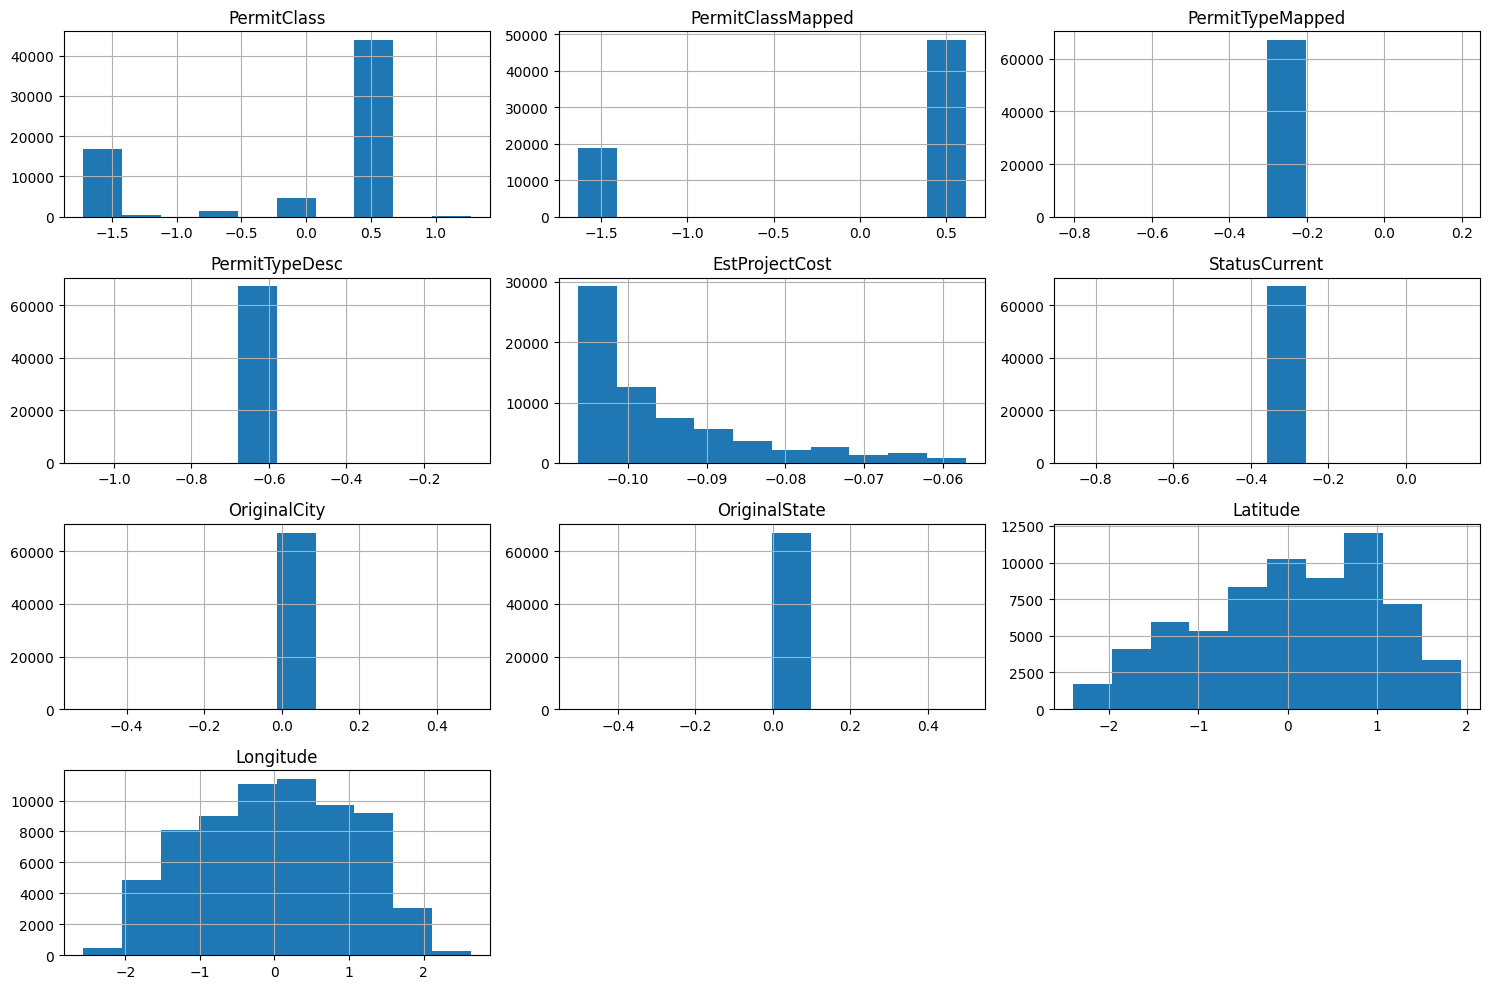

In [ ]:
# Ploting the Univariate Analysis of numerical data
fig, axes = plt.subplots(nrows=len(numeric_cols)//3 + 1, 
                        ncols=3, 
                        figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    
    # Customize axis labels and titles
    ax.set_xlabel('Standardized Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)
    ax.set_title(f'Distribution of {col}', fontsize=12, pad=10)
    
    # Add mean/std annotation
    ax.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    ax.text(0.95, 0.95, 
            f'Mean: {df[col].mean():.2f}\nStd: {df[col].std():.2f}',
            transform=ax.transAxes,
            ha='right', va='top',
            bbox=dict(facecolor='white', alpha=0.8))

# Hide any empty subplots
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

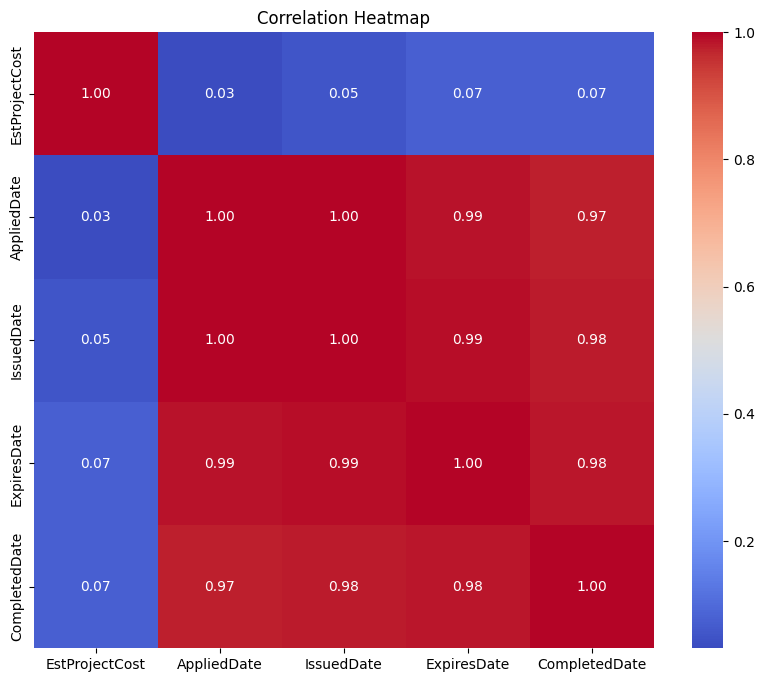

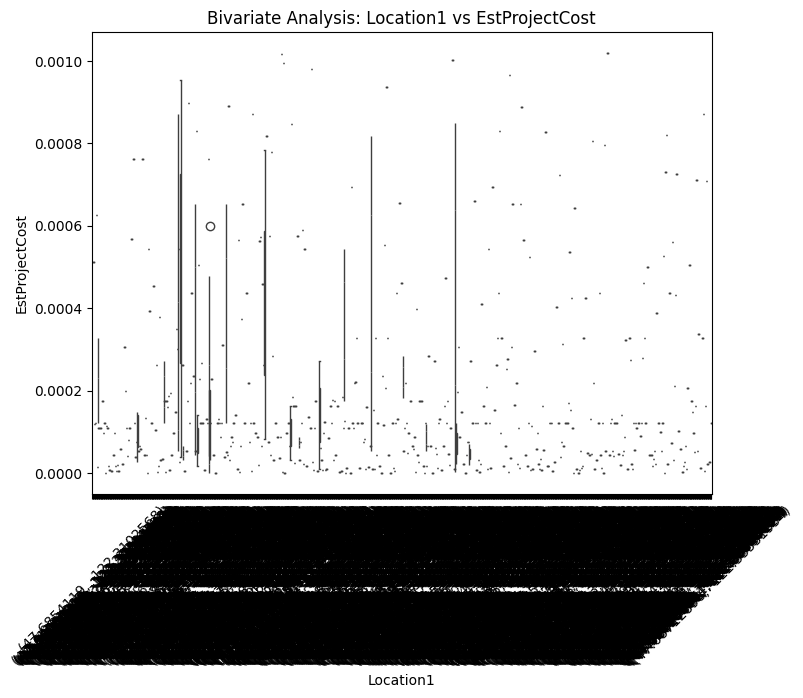

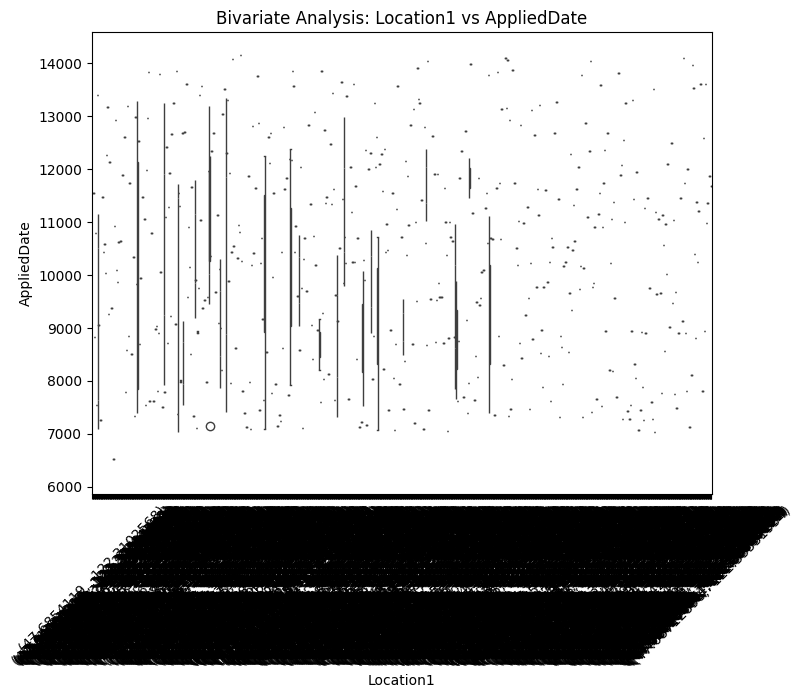

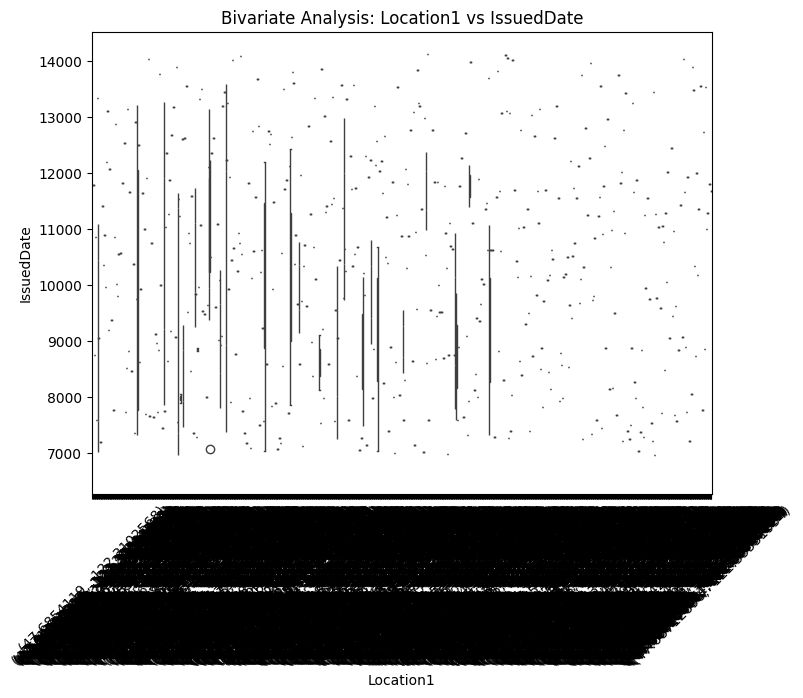

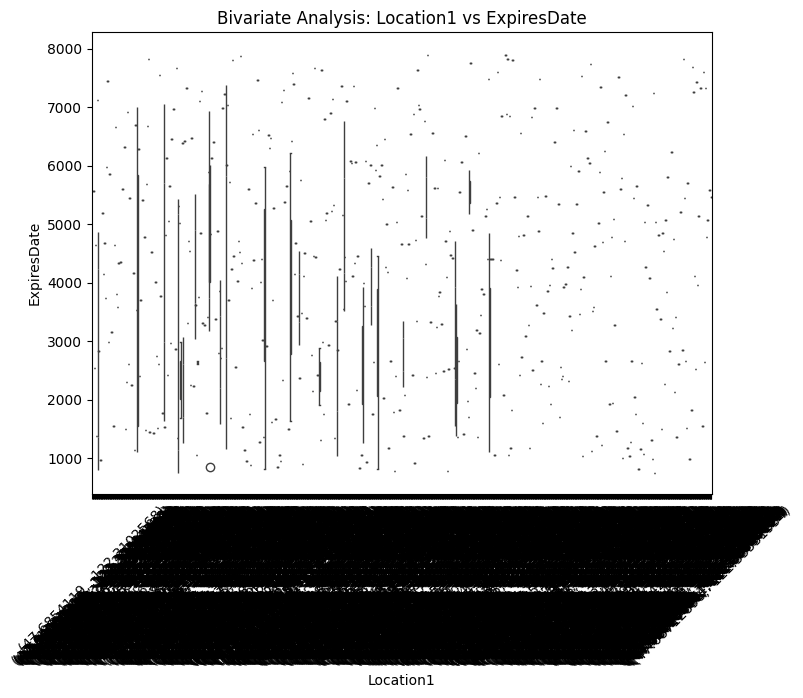

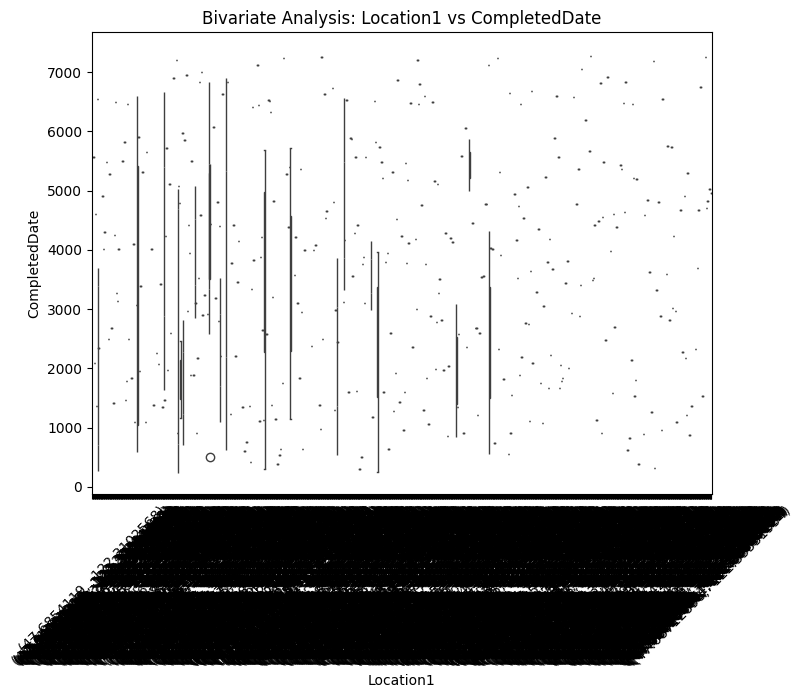

In [146]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optimized Bivariate Analysis Function without Pairplot
def bivariate_analysis(df, sample_size=1000):
    # Limit the number of numeric and categorical columns for analysis
    numeric_cols = df.select_dtypes(include=['number']).columns[:5]  # Limit to first 5 numeric columns
    categorical_cols = df.select_dtypes(include=['object']).columns[:5]  # Limit to first 5 categorical columns

    # If the dataset is large, take a random sample of the data to speed up plotting
    if len(df) > sample_size:
        df = df.sample(n=sample_size, random_state=42)
    
    # Correlation heatmap for numeric columns (if more than 1 numeric column)
    if len(numeric_cols) > 1:
        plt.figure(figsize=(10, 8))
        corr = df[numeric_cols].corr()
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap')
        plt.show()

    # Bivariate analysis for categorical vs numerical features (limit to first categorical and numeric columns)
    if len(categorical_cols) > 0 and len(numeric_cols) > 0:
        for cat_col in categorical_cols:
            for num_col in numeric_cols:
                plt.figure(figsize=(8, 6))
                sns.boxplot(data=df, x=cat_col, y=num_col)
                plt.title(f'Bivariate Analysis: {cat_col} vs {num_col}')
                plt.xticks(rotation=45)
                plt.show()

# Call the function for optimized bivariate analysis with a sample size limit
bivariate_analysis(df, sample_size=1000)


In [147]:
# Feature Engineering Function
def feature_engineering(df):
    # Example: Creating a new feature from existing columns
    if 'Column1' in df.columns and 'Column2' in df.columns:
        df['New_Feature'] = df['Column1'] * df['Column2']  # Example transformation
        print("\nFeature Engineering: New_Feature Created")
    else:
        print("\nFeature Engineering: Columns not found for new feature")

    # Dropping less useful features (example)
    df = df.drop(columns=['ColumnToRemove'], errors='ignore')
    return df

# Call the function
df = feature_engineering(df)



Feature Engineering: Columns not found for new feature


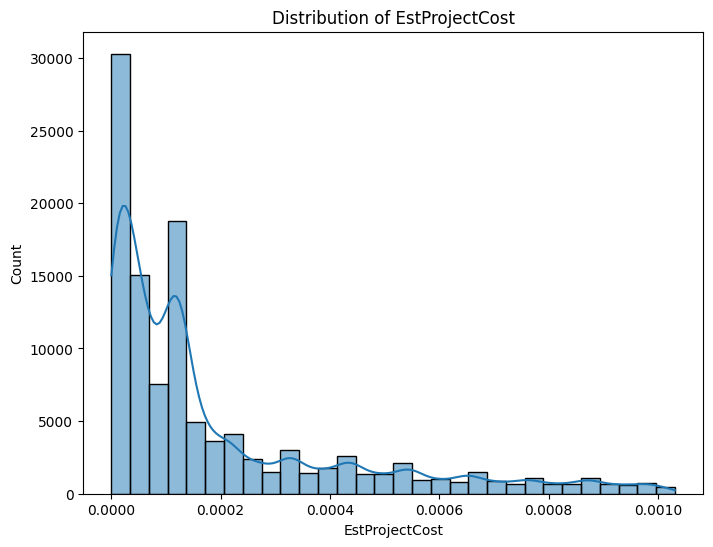

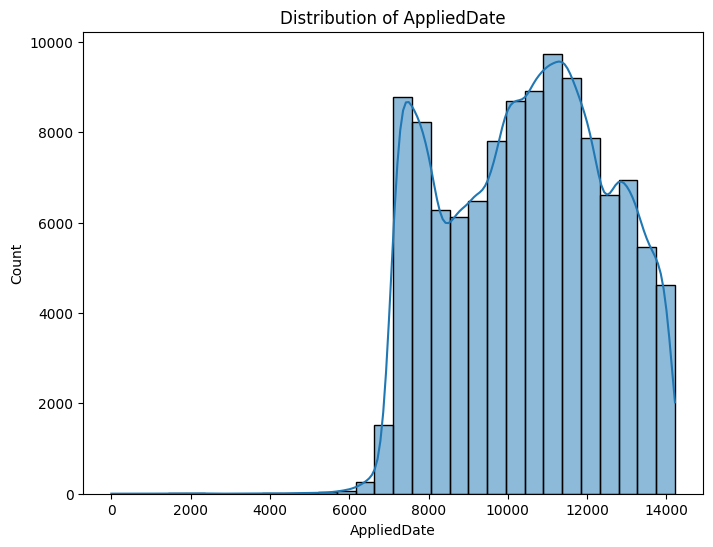

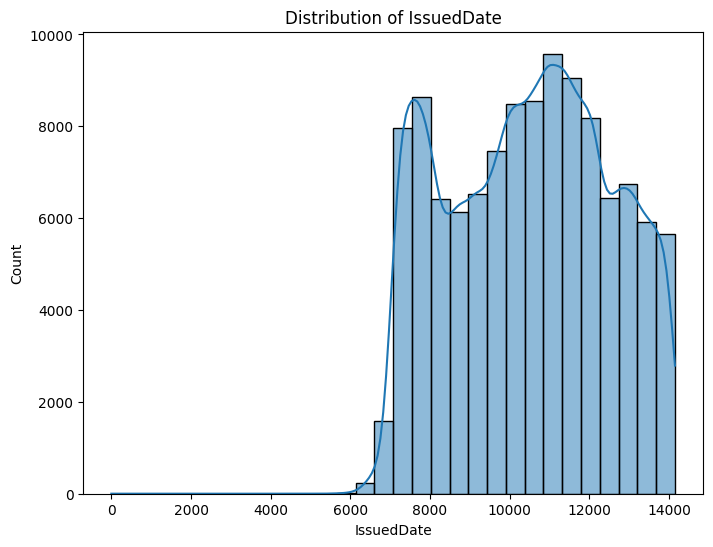

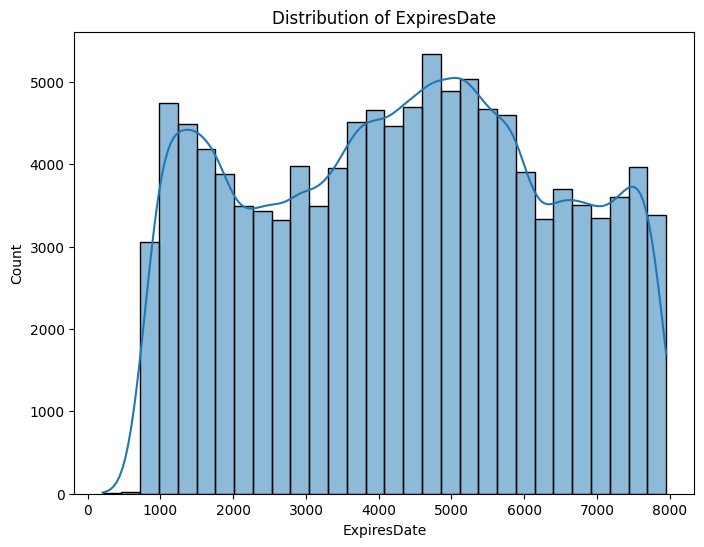

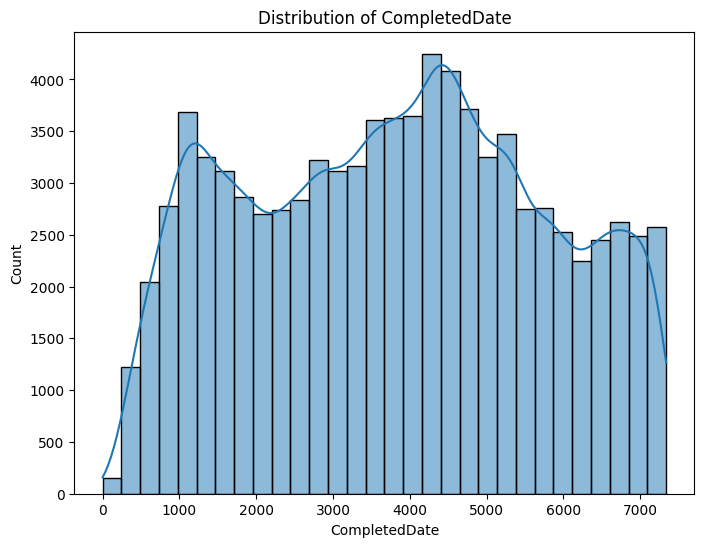

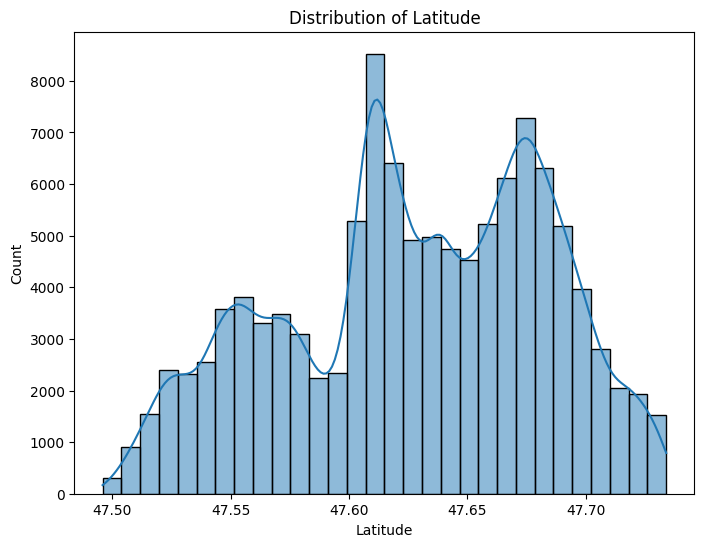

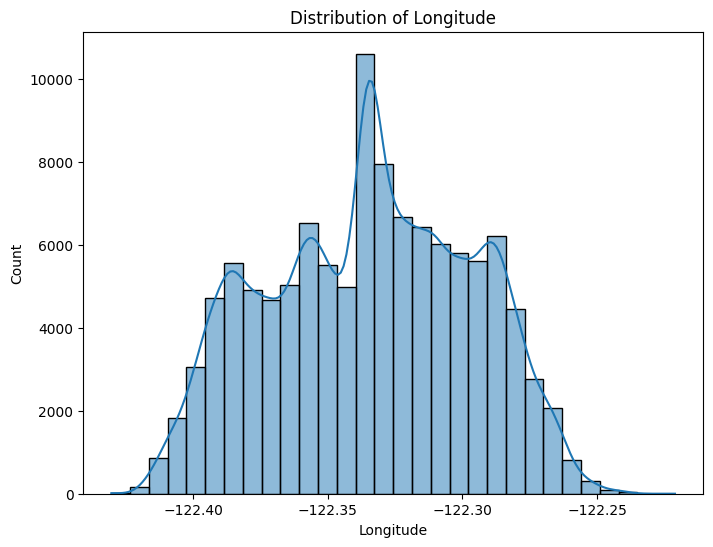

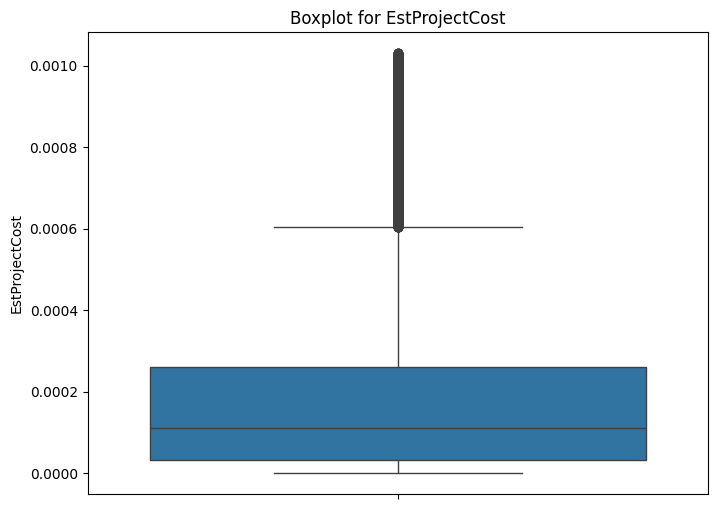

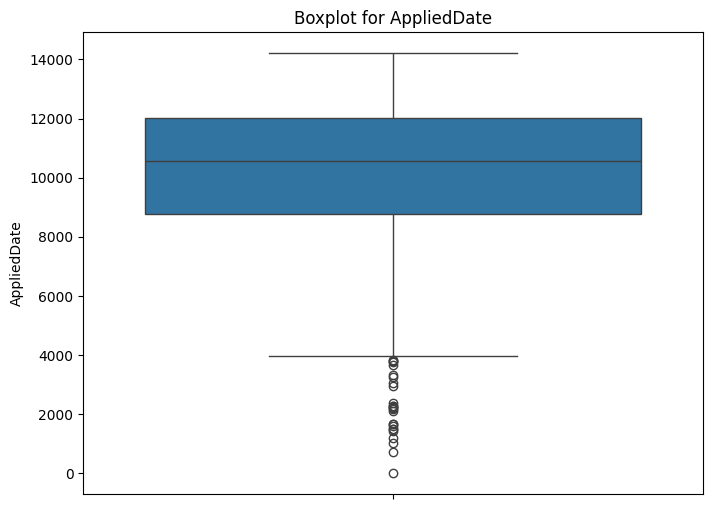

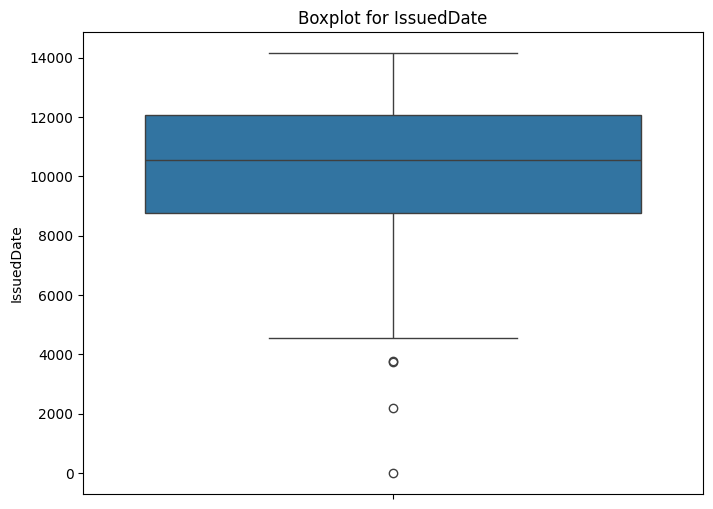

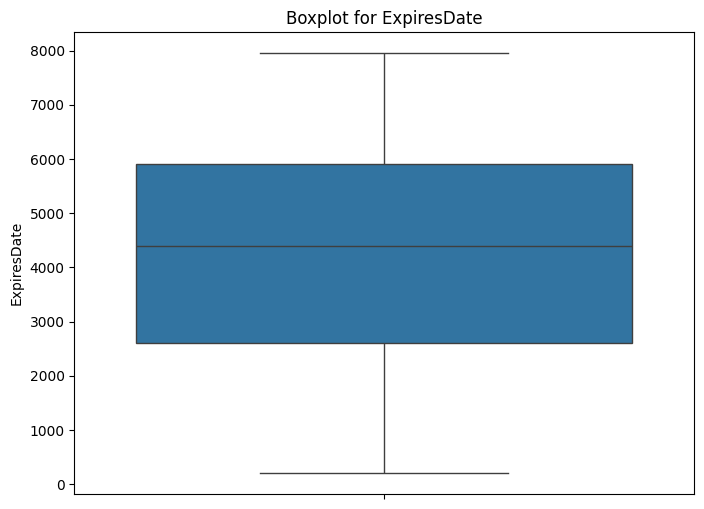

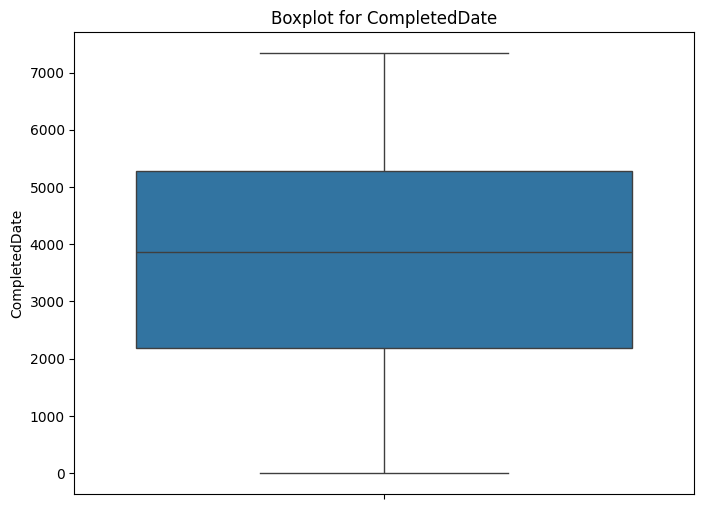

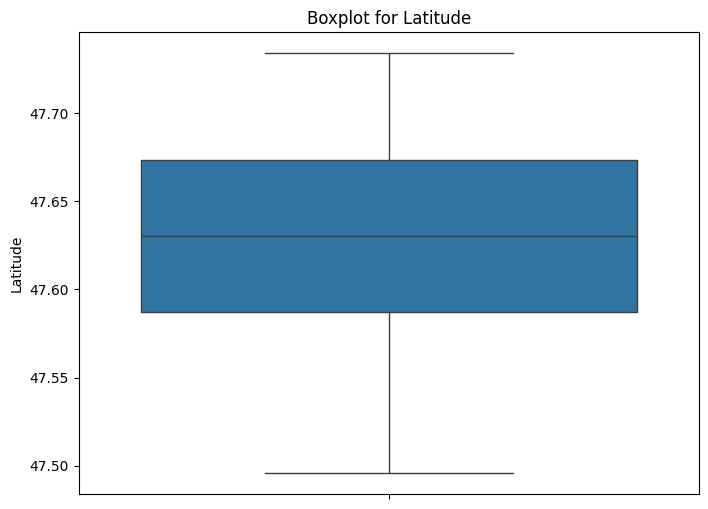

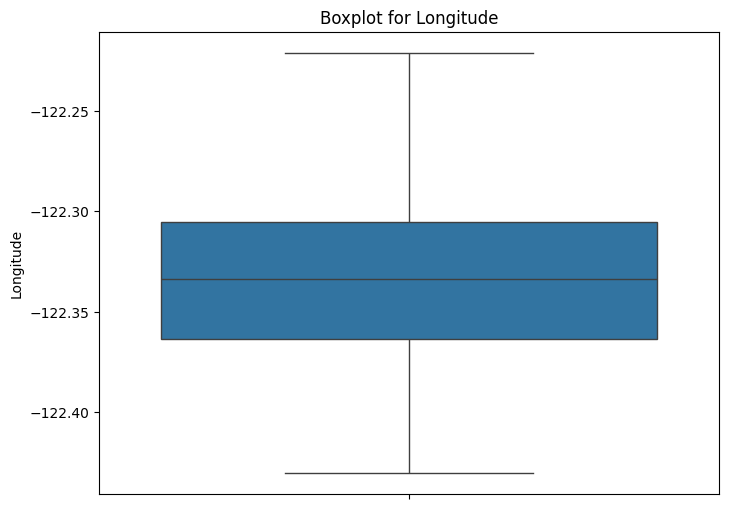

In [148]:
# Data Visualization Function
def data_visualization(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Distribution plots for numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f'Distribution of {col}')
        plt.show()

    # Boxplot for detecting outliers in numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(df[col])
        plt.title(f'Boxplot for {col}')
        plt.show()

# Call the function
data_visualization(df)


Dimensionality Reduction

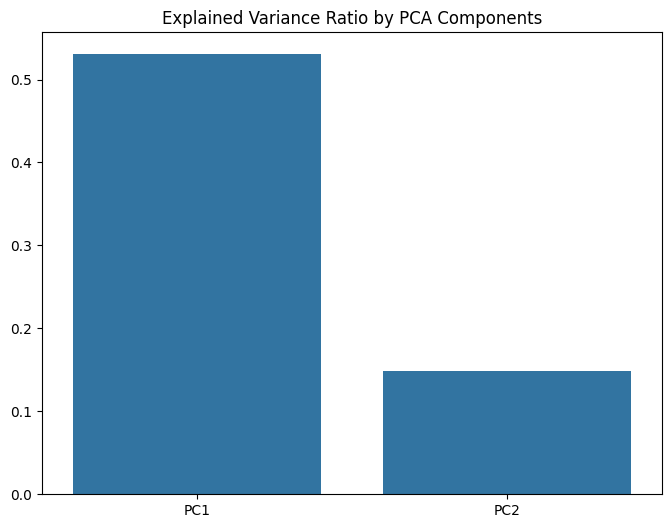

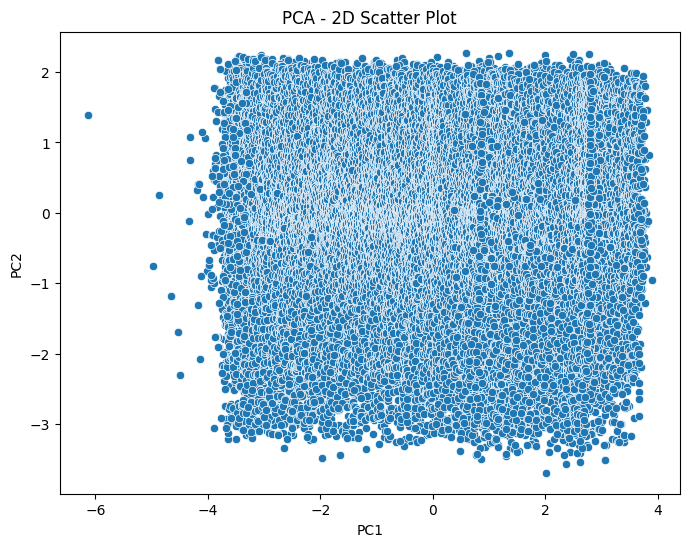

Original numeric features selected for PCA:
['EstProjectCost', 'AppliedDate', 'IssuedDate', 'ExpiresDate', 'CompletedDate', 'Latitude', 'Longitude']

PCA components (selected features for model training):
['PC1', 'PC2']


In [155]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# PCA for Dimensionality Reduction with handling missing values
def pca_analysis(df, n_components=2):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])

    # Handle missing values (impute with the mean)
    imputer = SimpleImputer(strategy='mean')  # You can also use median or most_frequent
    df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Standardizing the data before PCA
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric_imputed)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_scaled)

    # Creating a DataFrame for PCA components
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

    # Plotting the explained variance ratio to understand how much variance each principal component explains
    plt.figure(figsize=(8, 6))
    sns.barplot(x=[f'PC{i+1}' for i in range(n_components)], y=pca.explained_variance_ratio_)
    plt.title('Explained Variance Ratio by PCA Components')
    plt.show()

    # Plot the 2D PCA results (if n_components=2)
    if n_components == 2:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=pca_df['PC1'], y=pca_df['PC2'])
        plt.title('PCA - 2D Scatter Plot')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.show()

    return pca_df, df_numeric.columns.tolist()  # Returning both the PCA results and original features used

# Call the function for PCA with 2 components
pca_result, original_features_used = pca_analysis(df, n_components=2)

# Output the original features used for PCA (before transformation)
print("Original numeric features selected for PCA:")
print(original_features_used)

# Output the PCA components as the features used for model training
print("\nPCA components (selected features for model training):")
print(pca_result.columns.tolist())  # These are the PCA components (PC1, PC2, etc.)


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Changed to Linear Regression for regression task
from sklearn.ensemble import RandomForestRegressor  # For regression task
from sklearn.metrics import mean_squared_error  # For evaluating regression models
import pandas as pd

# PCA for Dimensionality Reduction with handling missing values
def pca_analysis(df, n_components=2):
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])

    # Handle missing values (impute with the mean)
    imputer = SimpleImputer(strategy='mean')
    df_numeric_imputed = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

    # Standardizing the data before PCA
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df_numeric_imputed)

    # Apply PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df_scaled)

    # Creating a DataFrame for PCA components
    pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_components)])

    return pca_df, df_numeric_imputed

# Example dataframe (replace 'df' with your actual dataframe)
df = pd.read_csv('Building_Permits_20250331.csv')

# Print columns to find the target column
print("Columns in the dataset:", df.columns)

# Apply PCA to get the components
pca_result, df_numeric_imputed = pca_analysis(df, n_components=2)

# Replace 'YourTargetColumn' with the actual column name you're predicting
# Example: Assuming 'EstimatedCost' is the target column
df_target = df['EstProjectCost']  # Replace with the actual target column name (e.g., 'EstimatedCost')

# Check for NaN values in target column and handle them
df_target = df_target.dropna()  # Remove rows with NaN values in the target column
df_pca_with_target = pd.concat([pca_result, df_target], axis=1)

# Ensure that the features and target have the same length after dropping NaN rows
X = df_pca_with_target[['PC1', 'PC2']]  # Use PC1 and PC2 as features
y = df_pca_with_target['EstProjectCost']  # Replace with your actual target column name

# Make sure X and y have the same length after dropping NaNs
X = X.loc[df_target.index]
y = y.loc[df_target.index]

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Linear Regression (for regression task)
lin_reg_model = LinearRegression()  # Using Linear Regression for continuous target variable
lin_reg_model.fit(X_train, y_train)
y_pred_lin_reg = lin_reg_model.predict(X_test)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)  # Evaluating using Mean Squared Error
print(f'Linear Regression Mean Squared Error: {mse_lin_reg:.2f}')

# 2. Random Forest Regressor (for regression task)
rf_model = RandomForestRegressor()  # Random Forest Regressor for regression task
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Evaluating using Mean Squared Error
print(f'Random Forest Regressor Mean Squared Error: {mse_rf:.2f}')

# 3. K-Nearest Neighbors Regressor (for regression task)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()  # Using KNN Regressor for continuous target
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)  # Evaluating using Mean Squared Error
print(f'KNN Regressor Mean Squared Error: {mse_knn:.2f}')

# 4. Support Vector Machine Regressor (for regression task)
from sklearn.svm import SVR
svm_model = SVR()  # Support Vector Regressor for regression task
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
mse_svm = mean_squared_error(y_test, y_pred_svm)  # Evaluating using Mean Squared Error
print(f'SVM Regressor Mean Squared Error: {mse_svm:.2f}')

# 5. Decision Tree Regressor (for regression task)
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()  # Decision Tree Regressor for regression task
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)  # Evaluating using Mean Squared Error
print(f'Decision Tree Regressor Mean Squared Error: {mse_dt:.2f}')


Columns in the dataset: Index(['PermitNum', 'PermitClass', 'PermitClassMapped', 'PermitTypeMapped',
       'PermitTypeDesc', 'Description', 'HousingUnits', 'HousingUnitsRemoved',
       'HousingUnitsAdded', 'EstProjectCost', 'AppliedDate', 'IssuedDate',
       'ExpiresDate', 'CompletedDate', 'StatusCurrent', 'RelatedMup',
       'OriginalAddress1', 'OriginalCity', 'OriginalState', 'OriginalZip',
       'ContractorCompanyName', 'Link', 'Latitude', 'Longitude', 'Location1'],
      dtype='object')
Linear Regression Mean Squared Error: 806422434841453.50
Random Forest Regressor Mean Squared Error: 63815960991520.13
KNN Regressor Mean Squared Error: 88223587462093.06
